## This notebook reloads previously saved models and prints the evaluation for comparison

In [7]:
# Imports

import tensorflow as tf
import numpy as np
import pandas as pd

import os

import sys
sys.path.append('..')
from helperfunctions import modelhelper as mh

TARGET_VAR = "dx_binary"
IMAGE_SIZE = (224, 224) # Change to fit your model

In [8]:
MODEL_PATH = "../models/"

In [9]:
# Load test_df from file
test_df = pd.read_csv("../data/processed/test_from_Metadata_processed.csv")

In [10]:
# List all the models in MODEL_PATH
model_list = os.listdir(MODEL_PATH)

# just keep elements with -h5 extension
model_list = [model for model in model_list if model[-3:] == ".h5"]


Loading file: 'model_colab_2023-10-02 16:47:09.388898.h5'
Evaluation model: 'MobilneNetV3Large_rand-weights'...
Image size: (224, 224)
Target variable is set to: dx_binary


 > Evaluating model MobilneNetV3Large_rand-weights:
 > Loading test images...
 > Test images loaded.


 > Converting labels to one hot format...
 > Getting model predictions...
63/63 [==============================] - 14s 213ms/step
 > Model predictions obtained.
 > ROC AUC: 0.5


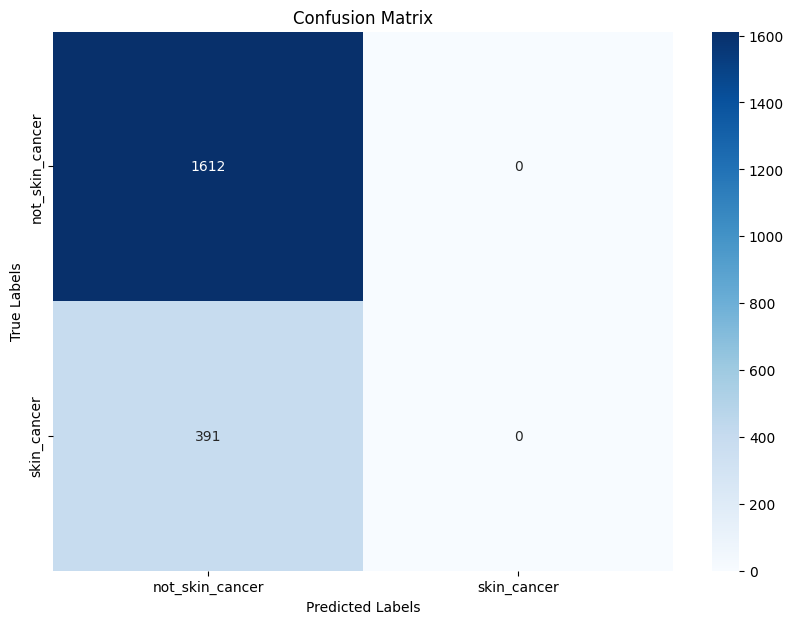



 > Computing classification report...
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1612
           1       0.00      0.00      0.00       391

    accuracy                           0.80      2003
   macro avg       0.40      0.50      0.45      2003
weighted avg       0.65      0.80      0.72      2003

 > Evaluating model on test set...


/Users/stefanberkenhoff/code/capstone-healthy-skin/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stefanberkenhoff/code/capstone-healthy-skin/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stefanberkenhoff/code/capstone-healthy-skin/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

63/63 [==============================] - 17s 258ms/step - loss: 0.6250 - accuracy: 0.8048
loss: 0.6249624490737915
accuracy: 0.8047928214073181
 > Done.


Loading file: 'model_2023-10-02 18:26:12.050411.h5'
Evaluation model: 'MobilneNetV3Large_pretrained-weights_binary_fixed-layers_custom-conv2D'...
Image size: (224, 224)
Target variable is set to: dx_binary


 > Evaluating model MobilneNetV3Large_pretrained-weights_binary_fixed-layers_custom-conv2D:
 > Loading test images...
 > Test images loaded.


 > Converting labels to one hot format...
 > Getting model predictions...
63/63 [==============================] - 15s 236ms/step
 > Model predictions obtained.
 > ROC AUC: 0.48904951990505985


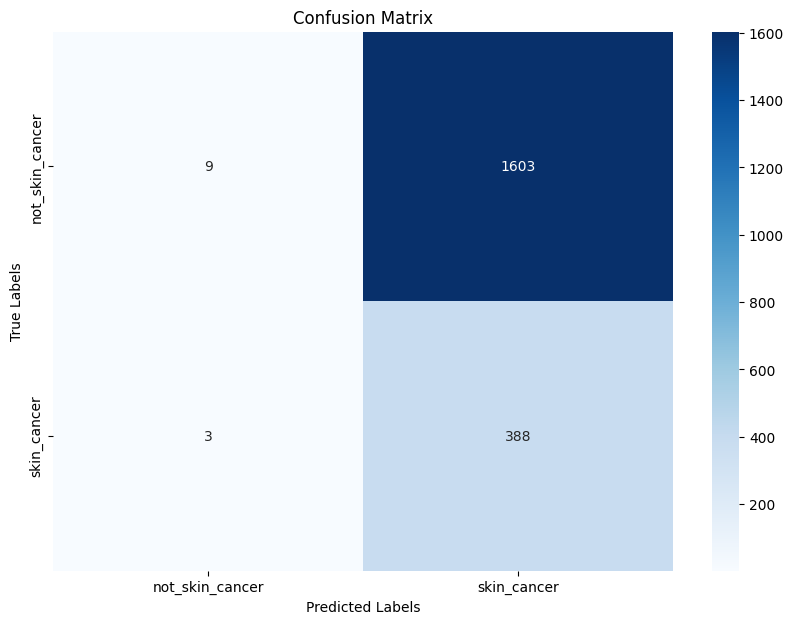



 > Computing classification report...
              precision    recall  f1-score   support

           0       0.75      0.01      0.01      1612
           1       0.19      0.99      0.33       391

    accuracy                           0.20      2003
   macro avg       0.47      0.50      0.17      2003
weighted avg       0.64      0.20      0.07      2003

 > Evaluating model on test set...
63/63 [==============================] - 15s 222ms/step - loss: 2.3453 - recall: 0.1747 - precision: 0.2025 - accuracy: 0.1982
loss: 2.3453214168548584
recall: 0.17473790049552917
precision: 0.20254629850387573
accuracy: 0.1982026994228363
 > Done.


Loading file: 'model_2023-10-02 17:45:34.714846.h5'
Evaluation model: 'MobilneNetV3Large_pretrained-weights_binary_fixed-layers_custom-conv2D'...
Image size: (224, 224)
Target variable is set to: dx_binary


 > Evaluating model MobilneNetV3Large_pretrained-weights_binary_fixed-layers_custom-conv2D:
 > Loading test images...
 > Test images loaded

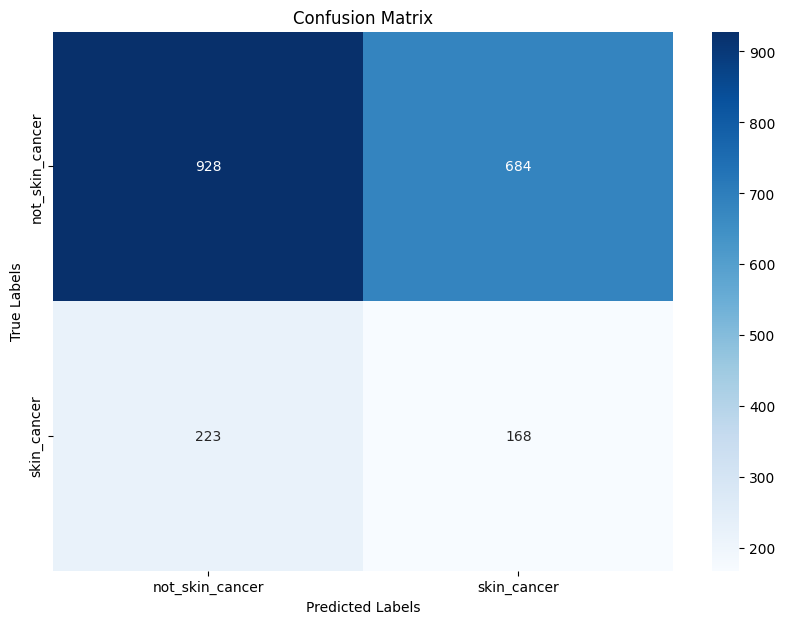



 > Computing classification report...
              precision    recall  f1-score   support

           0       0.81      0.58      0.67      1612
           1       0.20      0.43      0.27       391

    accuracy                           0.55      2003
   macro avg       0.50      0.50      0.47      2003
weighted avg       0.69      0.55      0.59      2003

 > Evaluating model on test set...
63/63 [==============================] - 15s 222ms/step - loss: 1.3047 - accuracy: 0.5472
loss: 1.3046942949295044
accuracy: 0.5471792221069336
 > Done.




In [11]:
for file_name in model_list:
    # load the model
    model = tf.keras.models.load_model(MODEL_PATH + file_name)
    print(f"Loading file: '{file_name}'")
    # get the model name
    model_name = model.name
    print(f"Evaluation model: '{model_name}'...")
    # get the image dimension from the loaded model
    IMAGE_SIZE = model.input_shape[1:3]
    print(f"Image size: {IMAGE_SIZE}")
    # get the target variable from global variable
    print(f"Target variable is set to: {TARGET_VAR}")
    print("\n")
    mh.model_accuracy_on_test(model, test_df, TARGET_VAR, IMAGE_SIZE)
    
    print("===="*10)
    print("\n")

In [12]:
test_df.shape

(2003, 10)